In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly
import squarify
import plotly.graph_objs as go 
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing  import OneHotEncoder
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("Customer-Churn-Records (1).csv")

In [3]:
target_var=data['Exited']
target_var.value_counts()


0    7962
1    2038
Name: Exited, dtype: int64

In [4]:
data.shape

(10000, 18)

In [5]:
data.isnull().any()

RowNumber             False
CustomerId            False
Surname               False
CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool

In [6]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [7]:
col_name=data.columns
for i in data.columns:
    print ("number of unique :{}\n{}\n uniquevalues \n{}".format(i,data[i].nunique(),data[i].unique()))
    print ("---------------------- \n")

number of unique :RowNumber
10000
 uniquevalues 
[    1     2     3 ...  9998  9999 10000]
---------------------- 

number of unique :CustomerId
10000
 uniquevalues 
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
---------------------- 

number of unique :Surname
2932
 uniquevalues 
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
---------------------- 

number of unique :CreditScore
460
 uniquevalues 
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 

In [8]:
unq=data[['RowNumber','CustomerId']]
data=data.drop(['RowNumber','CustomerId','Complain'], axis =1)

In [9]:
data_cat=data.select_dtypes(include=['object'])
data_numerical=data.select_dtypes(exclude=['object'])
for i in data_numerical.columns:
          if data_numerical[i].nunique()<15:
            data_cat[i]= data_numerical[i]
            data_numerical=data_numerical.drop(i,axis=1)
print(data_cat)
data_cat.columns

data_numerical.columns

encoder=LabelEncoder()
data['Surname']=encoder.fit_transform(data['Surname'])


        Surname Geography  Gender Card Type  Tenure  NumOfProducts  HasCrCard  \
0      Hargrave    France  Female   DIAMOND       2              1          1   
1          Hill     Spain  Female   DIAMOND       1              1          0   
2          Onio    France  Female   DIAMOND       8              3          1   
3          Boni    France  Female      GOLD       1              2          0   
4      Mitchell     Spain  Female      GOLD       2              1          1   
...         ...       ...     ...       ...     ...            ...        ...   
9995   Obijiaku    France    Male   DIAMOND       5              2          1   
9996  Johnstone    France    Male  PLATINUM      10              1          1   
9997        Liu    France  Female    SILVER       7              1          0   
9998  Sabbatini   Germany    Male      GOLD       3              2          1   
9999     Walker    France  Female   DIAMOND       4              1          1   

      IsActiveMember  Exite

In [10]:
col=data_cat.columns.drop(['Surname','Exited'])


col

Index(['Geography', 'Gender', 'Card Type', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Satisfaction Score'],
      dtype='object')

In [11]:
x=data.columns.drop(col)
dataset=pd.DataFrame()
dataset[x]=data[x]

x

Index(['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited',
       'Point Earned'],
      dtype='object')

In [12]:
##one hot encoading 
for i in data[col]:
    j=pd.get_dummies(data=data[i],drop_first=True,prefix='cata{}'.format(i),prefix_sep='_')
    dataset=pd.concat([dataset,j],axis=1)

In [13]:
dataset

,Surname,CreditScore,Age,Balance,EstimatedSalary,Exited,Point Earned,cataGeography_Germany,cataGeography_Spain,cataGender_Male,...,cataTenure_10,cataNumOfProducts_2,cataNumOfProducts_3,cataNumOfProducts_4,cataHasCrCard_1,cataIsActiveMember_1,cataSatisfaction Score_2,cataSatisfaction Score_3,cataSatisfaction Score_4,cataSatisfaction Score_5
0,1115,619,42,0.00,101348.88,1,464,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,1177,608,41,83807.86,112542.58,0,456,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2040,502,42,159660.80,113931.57,1,377,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,289,699,39,0.00,93826.63,0,350,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1822,850,43,125510.82,79084.10,0,425,0,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,771,39,0.00,96270.64,0,300,0,0,1,...,0,1,0,0,1,0,0,0,0,0
9996,1336,516,35,57369.61,101699.77,0,771,0,0,1,...,1,0,0,0,1,1,0,0,0,1
9997,1570,709,36,0.00,42085.58,1,564,0,0,0,...,0,0,0,0,0,1,0,1,0,0
9998,2345,772,42,75075.31,92888.52,1,339,1,0,1,...,0,1,0,0,1,0,1,0,0,0


In [14]:
dataset.shape

(10000, 32)

In [15]:
dataset.columns

Index(['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited',
       'Point Earned', 'cataGeography_Germany', 'cataGeography_Spain',
       'cataGender_Male', 'cataCard Type_GOLD', 'cataCard Type_PLATINUM',
       'cataCard Type_SILVER', 'cataTenure_1', 'cataTenure_2', 'cataTenure_3',
       'cataTenure_4', 'cataTenure_5', 'cataTenure_6', 'cataTenure_7',
       'cataTenure_8', 'cataTenure_9', 'cataTenure_10', 'cataNumOfProducts_2',
       'cataNumOfProducts_3', 'cataNumOfProducts_4', 'cataHasCrCard_1',
       'cataIsActiveMember_1', 'cataSatisfaction Score_2',
       'cataSatisfaction Score_3', 'cataSatisfaction Score_4',
       'cataSatisfaction Score_5'],
      dtype='object')

In [16]:
dataset.shape

(10000, 32)

In [17]:
## model selection 
## train test split 

#confusion matrix 
def evalmat(truevalue,predict):
    cm=confusion_matrix(truevalue,predict)
    print(cm)
    tn=cm[0,0]
    fp=cm[0,1]
    fn=cm[1,0]
    tp=cm[1,1]
    #Sensitivity/ Recall/ True Positive Rate = TP / [TP + FN]
    recall=tp/[tp/fn]
    #Specificity/TNR = TN / [TN + FP]
    specificity=tn/(tn+fp)
   #Accuracy = [TP + TN] / [TP + FN + FP + TN]
    accuracy= (tp + tn) / (tp + fn + fp + tn)
    #Precision = TP / [TP + FP]
    Precision = tp / (tp + fp)
    #F1-Score = [2 x Precision x Recall] / [Precision + Recall]
    F1_Score = (2*Precision*recall) /(Precision + recall)
    print('recall=',recall,'\n')
    print('specificity=',specificity,'\n','accuracy=',accuracy,'\n','Precision=',Precision,'\n')
    print('F1_Score =',F1_Score,'\n')

In [18]:
X=dataset
Y=target_var 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=55)
scaler=MinMaxScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])


## default

In [19]:
modelsvm=svm.SVC(kernel='linear')
modelsvm.fit(X_train,Y_train)
modelsvm_train_pred=modelsvm.predict(X_train)
modelsvm_test_pred=modelsvm.predict(X_test)
print('train evelution metrics\n')
evalmat(Y_train,modelsvm_train_pred)
print('test evelution metrics\n')
evalmat(Y_test,modelsvm_test_pred)

train evelution metrics

[[5574    0]
 [   0 1426]]
recall= [0.] 

specificity= 1.0 
 accuracy= 1.0 
 Precision= 1.0 

F1_Score = [0.] 

test evelution metrics

[[2388    0]
 [ 601   11]]
recall= [601.] 

specificity= 1.0 
 accuracy= 0.7996666666666666 
 Precision= 1.0 

F1_Score = [1.99667774] 



C:\Users\Asus\AppData\Local\Temp\ipykernel_19776\3941526654.py:13: RuntimeWarning:

divide by zero encountered in longlong_scalars



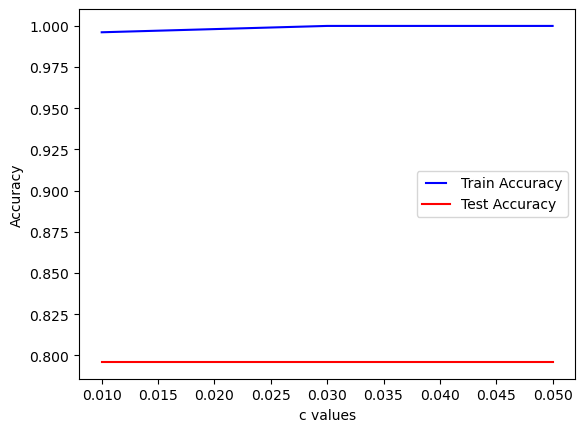

In [20]:
## hyper parameter tuning  framing the grid search cv 


    #'penalty': ['l1', 'l2'],

max_depths =[0.01,0.03,0.05]

#linspace generates the samples 
train_results = []
test_results = []
for i in max_depths:
    modelsvm=svm.SVC(C=i)
    modelsvm.fit(X_train,Y_train)

    train_pred = modelsvm.predict(X_train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modelsvm.predict(X_test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('c values')
plt.show()





## hyper param tuning 


In [21]:
from sklearn.pipeline import Pipeline

modelsvm=svm.SVC(kernel='linear')


# Initialize RFE
rfe = RFE(estimator=modelsvm)

# Create a pipeline
pipeline = Pipeline([('feature_selection', rfe), ('svm', modelsvm)])

# Create a parameter grid
param_grid = {
    'feature_selection__n_features_to_select': [10,11,12],
         'svm__C': [0.1, 1, 10],
        'svm__probability': [True, False],
    'svm__class_weight': ['balanced', None]
}
model=GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)


model.fit(X_train,Y_train)

model.best_estimator_

Pipeline(steps=[('feature_selection',
                 RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)),
                ('svm',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True))])

In [22]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('train evelution metrics\n')
evalmat(Y_train,train_pred)
print('test evelution metrics\n')
evalmat(Y_test,test_pred)

train evelution metrics

[[5574    0]
 [   0 1426]]
recall= [0.] 

specificity= 1.0 
 accuracy= 1.0 
 Precision= 1.0 

F1_Score = [0.] 

test evelution metrics

[[2388    0]
 [ 459  153]]
recall= [459.] 

specificity= 1.0 
 accuracy= 0.847 
 Precision= 1.0 

F1_Score = [1.99565217] 



C:\Users\Asus\AppData\Local\Temp\ipykernel_19776\3941526654.py:13: RuntimeWarning:

divide by zero encountered in longlong_scalars



train
   Cust_ID  Exited  Exited_Prob  predicted
0     6235       0     0.000179          0
1     4029       0     0.000179          0
2     2918       1     0.999999          1
3     4396       0     0.000179          0
4     8578       0     0.000179          0
test
   Cust_ID  Exited   Exited_Prob  predicted
0     2082       0  1.184596e-02          0
1      679       0  5.417697e-04          0
2     2751       0  1.000000e-07          0
3     3295       0  1.208645e-03          0
4     5392       1  9.999999e-01          1
[[5574    0]
 [   0 1426]]
recall= [0.] 

specificity= 1.0 
 accuracy= 1.0 
 Precision= 1.0 

F1_Score = [0.] 

test_proba mertrics
[[2388    0]
 [ 459  153]]
recall= [459.] 

specificity= 1.0 
 accuracy= 0.847 
 Precision= 1.0 

F1_Score = [1.99565217] 



C:\Users\Asus\AppData\Local\Temp\ipykernel_19776\3941526654.py:13: RuntimeWarning:

divide by zero encountered in longlong_scalars



     threshold  accuracy  sensi  speci
0.0        0.0  0.203714    1.0    0.0
0.1        0.1  1.000000    1.0    1.0
0.2        0.2  1.000000    1.0    1.0
0.3        0.3  1.000000    1.0    1.0
0.4        0.4  1.000000    1.0    1.0
0.5        0.5  1.000000    1.0    1.0
0.6        0.6  1.000000    1.0    1.0
0.7        0.7  1.000000    1.0    1.0
0.8        0.8  1.000000    1.0    1.0
0.9        0.9  1.000000    1.0    1.0


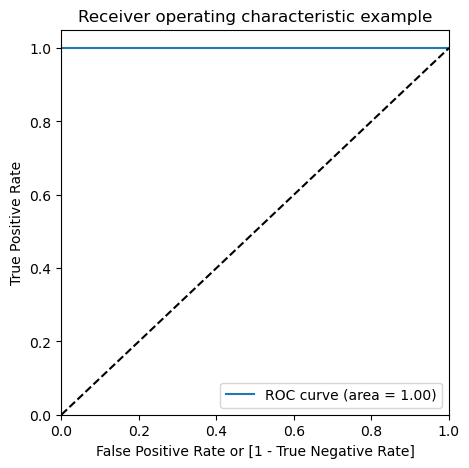

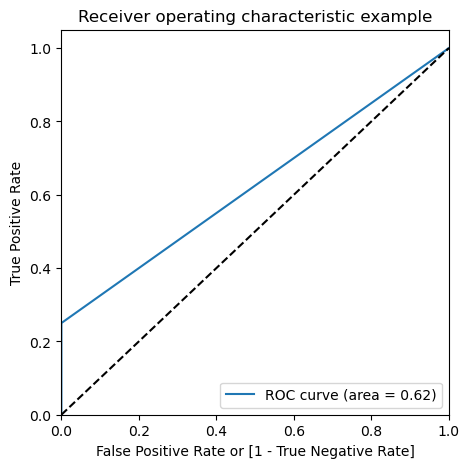

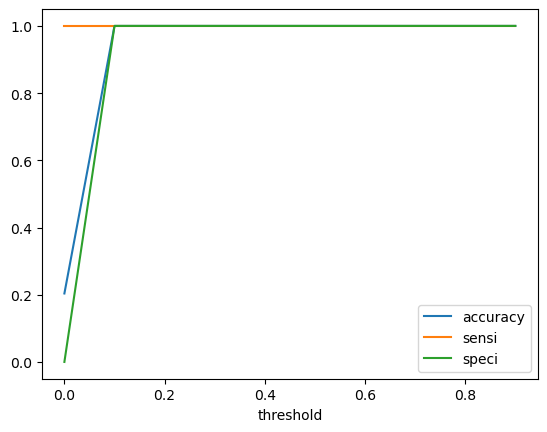

In [23]:
def get_predictions(x_train,y_train):
    y_train_proba = pd.DataFrame({'Exited':y_train.values,
                                  'Exited_Prob':model.predict_proba(x_train)[:,1]})
    y_train_proba['Cust_ID'] = y_train.index
    y_train_proba = y_train_proba.reindex(['Cust_ID','Exited','Exited_Prob'], axis=1)
    y_train_proba['predicted'] = y_train_proba.Exited_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_proba
    
   

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show

    return None

y_train_proba=get_predictions(X_train,Y_train)    
y_test_proba=get_predictions(X_test,Y_test) 
print('train')
print(y_train_proba.head())
draw_roc(Y_train,y_train_proba['predicted'])
print('test')
print(y_test_proba.head())
draw_roc(Y_test,y_test_proba['predicted'])

evalmat(Y_train,y_train_proba.predicted)
print('test_proba mertrics')
evalmat(Y_test,y_test_proba.predicted)

for i in range(10):
        y_train_proba[i/10] = y_train_proba.Exited_Prob.map(lambda x: 1 if x > i/10 else 0)


y_train_proba

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_proba.Exited, y_train_proba[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

In [24]:
y_train_proba['final_predicted'] = y_train_proba.Exited_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_proba.head()
y_test_proba['final_predicted'] = y_test_proba.Exited_Prob.map( lambda x: 1 if x > 0.1 else 0)
evalmat(Y_train,y_train_proba['final_predicted'])
evalmat(Y_test,y_test_proba['final_predicted'])

[[5574    0]
 [   0 1426]]
recall= [0.] 

specificity= 1.0 
 accuracy= 1.0 
 Precision= 1.0 

F1_Score = [0.] 

[[2388    0]
 [ 459  153]]
recall= [459.] 

specificity= 1.0 
 accuracy= 0.847 
 Precision= 1.0 

F1_Score = [1.99565217] 



C:\Users\Asus\AppData\Local\Temp\ipykernel_19776\3941526654.py:13: RuntimeWarning:

divide by zero encountered in longlong_scalars

